### Poltfolio Optimization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import math
import scipy.optimize as spo

In [2]:
from util_PO import *

In [3]:
def optimize_portfolio(sd=dt.datetime(2008,1,1), ed=dt.datetime(2009,1,1), \
    syms=['GOOG','AAPL','GLD','XOM'], gen_plot=False):
    
    normed_syms_price,normed_SPY_price  = normalized_portfolio(sd,ed,syms)
    
    # Guessing that the allocation equally divided among the portfolio stocks
    allocation_guesses = np.asarray([1.0/len(syms)] * len(syms)) 
     
    # Find the allocations for the optimal portfolio
    bounds = [(0.0, 1.0)] * len(syms)
    
    #Lambda function applies sum_constraint such that return value must come back as 0 to be accepted
    #if return value is anything other than 0 it's rejected as not a valid answer.
    constraint = {'type': 'eq', 'fun': lambda inputs: 1.0 - np.sum(inputs)}  
    
    optimized_allocations = spo.minimize(sharpe_ratio_funtion, allocation_guesses,args=(normed_syms_price, ),\
                             method='SLSQP', options={'disp':True}, bounds=bounds, constraints=constraint).x
    
    #allocated = normed_syms_price * optimized_allocations
    
    return optimized_allocations

In [4]:
def test_run():
    # Define a date range
    
    start_date = dt.datetime(2015,1,1)
    end_date = dt.datetime(2016,1,1)
    dates = pd.date_range(start_date,end_date) # the year 2008
    #print (dates)
    #print('******************')
            
    #Read in more stocks 
    #symbols = ['AMZN', 'FB', 'AXY', 'GLD']
    symbols = ['IBM', 'X', 'JPM','GLD','XOM','AMZN', 'FB', 'AXY']

    # Define input parameters
    #allocations = [0.8, 0.0, 0.2, 0.0]
    start_val = 1000000  
    risk_free_rate = 0.0
    sample_freq = 252
    
    # Optmize the allocations using minimizing negative sharp ratio
    allocations = optimize_portfolio(sd = start_date, ed = end_date, syms = symbols)
    
    # Assess the portfolio
    cr, adr, sddr, sr, ev = assess_portfolio(sd = start_date, ed = end_date,\
        syms = symbols, \
        allocs = allocations,\
        sv = start_val, \
        gen_plot = True)

    # Print statistics
    print("Start Date:", start_date)
    print("End Date:", end_date)
    print("Symbols:", symbols)
    print("Allocations:", allocations)
    print("Allocations:", np.round(allocations,2))
    print("Sharpe Ratio:", sr)
    print("Volatility (stdev of daily returns):", sddr)
    print("Average Daily Return:", adr)
    print("Cumulative Return:", cr)
    

   

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -7.2671140643279335
            Iterations: 7
            Function evaluations: 78
            Gradient evaluations: 7


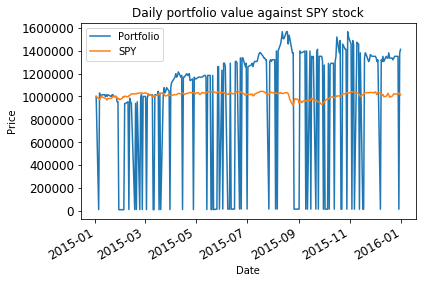

Start Date: 2015-01-01 00:00:00
End Date: 2016-01-01 00:00:00
Symbols: ['IBM', 'X', 'JPM', 'GLD', 'XOM', 'AMZN', 'FB', 'AXY']
Allocations: [  2.52178852e-16   2.88707338e-03   0.00000000e+00   8.97040583e-17
   0.00000000e+00   1.91913656e-16   0.00000000e+00   9.97112927e-01]
Allocations: [ 0.  0.  0.  0.  0.  0.  0.  1.]
Sharpe Ratio: 7.26711406433
Volatility (stdev of daily returns): 39.2883056399
Average Daily Return: 17.985603137
Cumulative Return: 0.412174669173


In [5]:
if __name__ == "__main__":
    test_run()